In [19]:
from data import data_generation, batch_creator, gp_kernels
import sklearn.gaussian_process as gp 
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib inline

In [2]:
pad_pos_tr, pad_pos_te, pad_y_fren_tr, pad_y_fren_te, _, df_te = data_generation.data_generator_for_gp_mimick_gpt(50000, gp_kernels.rbf_kernel)

In [3]:
indices_tr = np.random.choice(np.arange(0, len(pad_pos_tr.reshape(-1)), 1), 10000)
x_tr = pad_pos_tr.reshape(-1)[indices_tr]; y_tr = pad_y_fren_tr.reshape(-1)[indices_tr]

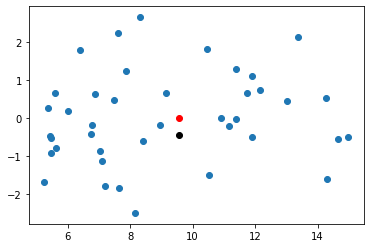

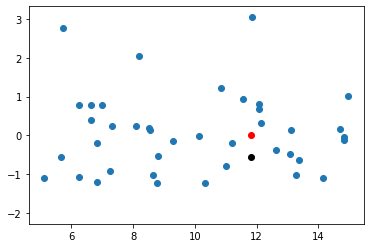

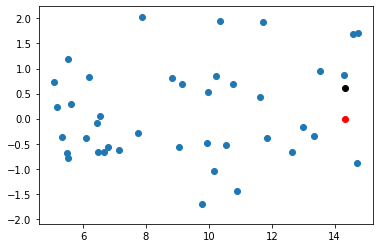

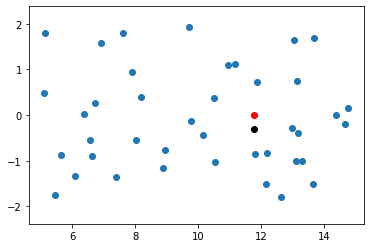

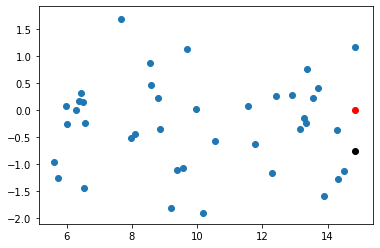

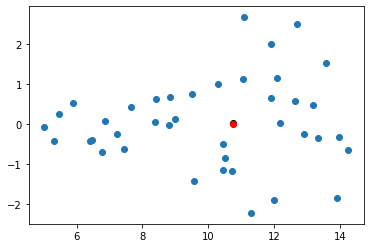

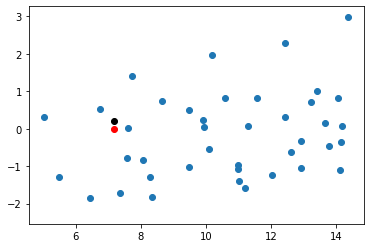

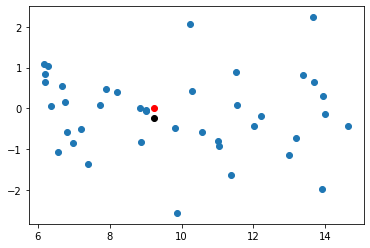

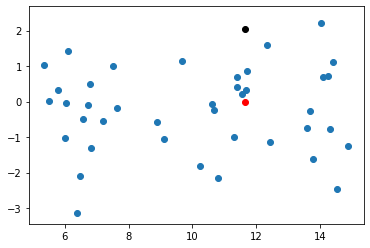

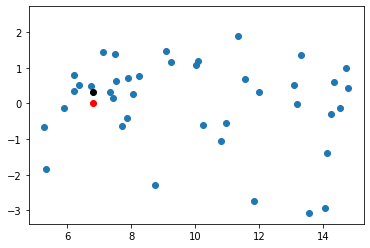

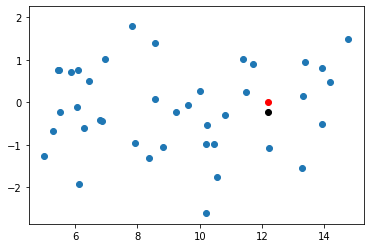

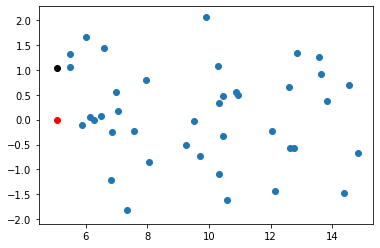

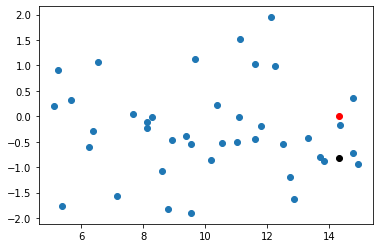

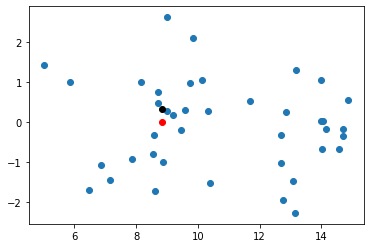

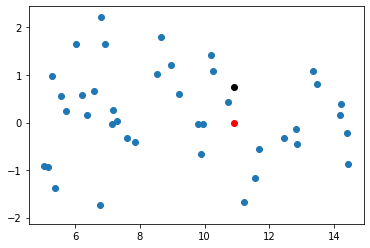

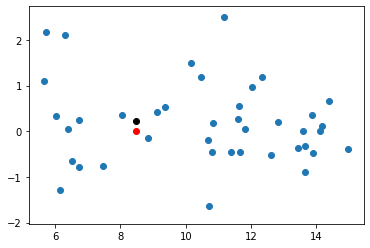

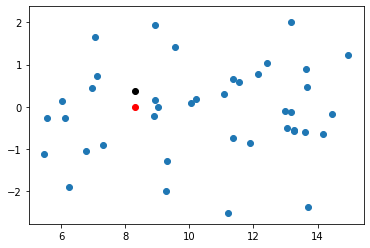

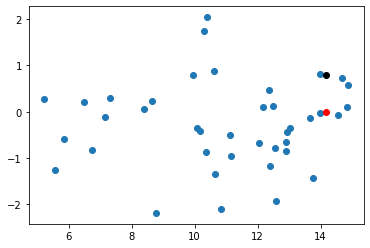

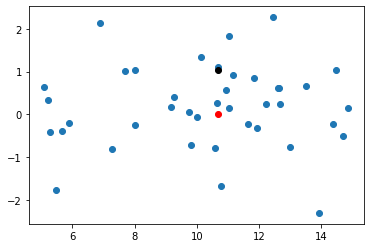

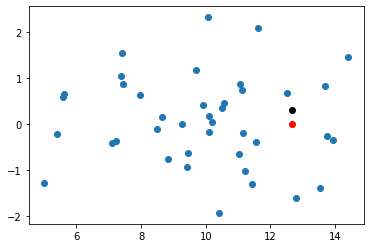

KeyboardInterrupt: 

In [27]:
# Online GP sequence learning  
online = False; mse = 0
μ = []; σ = []
m = int(x_tr.shape[0] / 59)
for j in range(0, m):
    λ=np.exp(-1); ν=1;
    kernel = ν**2 * gp.kernels.RBF(length_scale=λ) #+ gp.kernels.WhiteKernel(noise_level=σ)
    model = gp.GaussianProcessRegressor(kernel=kernel)
    xx_tr =  x_tr.reshape(-1, 1)[(59 * j):(40 + 59 * j)]; yy_tr = y_tr.reshape(-1, 1)[(59 * j):(40 + 59 * j)]
    plt.scatter(xx_tr, yy_tr)
    model.fit(xx_tr, yy_tr)
    if online:
        pass
    else: 
        xx_te = x_tr.reshape(-1, 1)[(40 + 59 * j)]
        yy_te = y_tr.reshape(-1, 1)[(40 + 59 * j)]
        plt.scatter(xx_te, yy_te, c='black')
        μ_te, σ_te = model.predict(xx_te.reshape(-1, 1) , return_std=True)
        plt.scatter(xx_te, μ_te, c='red')
        plt.fill_between(xx_te, μ_te.squeeze()-2*σ_te, μ_te.squeeze()+2*σ_te)
        plt.show()
        μ.append(μ_te); σ.append(σ_te)
        
    mse += (sum((yy_te - μ_te)**2))
mse *= (1/m) 

In [17]:
μ

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[6.01283593e-87]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[-3.92309949e-81]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),

In [15]:
σ

[array([1.19228846]),
 array([1.01403406]),
 array([0.951241]),
 array([1.08123167]),
 array([0.86973359]),
 array([1.07903343]),
 array([1.13761992]),
 array([0.97697059]),
 array([1.20230123]),
 array([1.2257815]),
 array([1.01298341]),
 array([0.9461807]),
 array([0.94189124]),
 array([1.10901636]),
 array([0.9609595]),
 array([0.90544192]),
 array([1.07423762]),
 array([0.95077616]),
 array([0.97148069]),
 array([0.96772608]),
 array([1.10278918]),
 array([0.98396971]),
 array([0.95242334]),
 array([1.01895893]),
 array([1.1878664]),
 array([1.02409257]),
 array([1.18106204]),
 array([0.91697082]),
 array([1.03018502]),
 array([0.94749787]),
 array([1.05796917]),
 array([0.86365892]),
 array([0.96498637]),
 array([1.92126586]),
 array([0.93070865]),
 array([1.14476037]),
 array([0.92617837]),
 array([0.89441549]),
 array([1.04550439]),
 array([0.95250729]),
 array([0.99153264]),
 array([0.83831466]),
 array([0.99335114]),
 array([0.95544527]),
 array([1.1935264]),
 array([0.9309900

In [16]:
mse

array([0.84926919])

In [56]:
μ_te, σ_te = model.predict(x_te.reshape(-1, 1), return_std=True)

In [59]:
sum((μ_te -  y_te.reshape(-1, 1)) ** 2) / len(μ_te)

array([1.01432648])

In [62]:
sum((y_te.mean() -  y_te.reshape(-1, 1)) ** 2) / len(μ_te)

array([1.01301103])

In [ ]:
with matplotlib.rc_context({'figure.figsize': [10,2.5]}):
    plt.scatter(x.squeeze(), y)
    plt.scatter(x, μ_tr, c='black')